In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read edge list from .csv file
edge_list_file = 'Surat.csv'
G = nx.Graph()

# Read the edge list and create the graph
with open(edge_list_file, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Skip header row if present
    for row in reader:
        source = row[0]
        target = row[1]
        G.add_edge(source, target)

(array([  8.,  11.,  14.,  21.,  16.,  17.,  31.,  28.,  30.,  33.,  34.,
         43.,  62.,  69.,  61.,  60.,  71.,  64.,  78.,  64.,  54.,  72.,
         82.,  75.,  69.,  91.,  80.,  85.,  82.,  92., 113.,  86.,  88.,
         85.,  70.,  68.,  61.,  65.,  51.,  45.,  30.,  22.,  26.,  25.,
         23.,  18.,  10.,  13.,   9.,   3.]),
 array([2.38326108, 2.42850449, 2.4737479 , 2.51899131, 2.56423472,
        2.60947812, 2.65472153, 2.69996494, 2.74520835, 2.79045175,
        2.83569516, 2.88093857, 2.92618198, 2.97142538, 3.01666879,
        3.0619122 , 3.10715561, 3.15239901, 3.19764242, 3.24288583,
        3.28812924, 3.33337265, 3.37861605, 3.42385946, 3.46910287,
        3.51434628, 3.55958968, 3.60483309, 3.6500765 , 3.69531991,
        3.74056331, 3.78580672, 3.83105013, 3.87629354, 3.92153694,
        3.96678035, 4.01202376, 4.05726717, 4.10251058, 4.14775398,
        4.19299739, 4.2382408 , 4.28348421, 4.32872761, 4.37397102,
        4.41921443, 4.46445784, 4.50970124, 4.

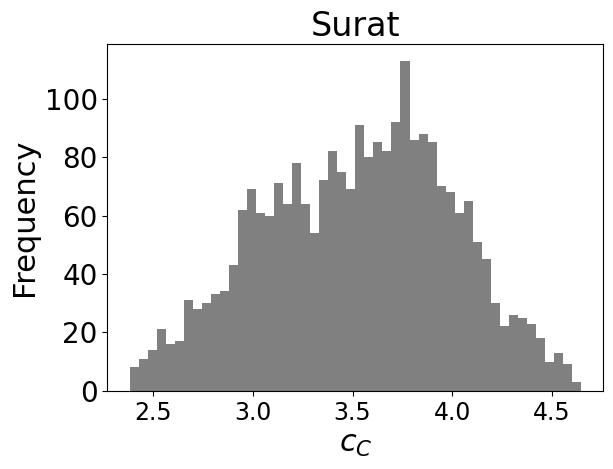

In [2]:
# Calculate the closeness centrality distribution
closeness_centralities = nx.closeness_centrality(G)
closeness_distribution = list(closeness_centralities.values())

# Remove nodes with closeness centrality equal to 0 or close to 0
to_remove = []
for node, closeness_centrality in closeness_centralities.items():
    if closeness_centrality <= 0.011:  # Threshold for close to 0 values
        to_remove.append(node)

G.remove_nodes_from(to_remove)

# Calculate the closeness centrality distribution after removal
closeness_centralities = nx.closeness_centrality(G)
closeness_distribution = list(closeness_centralities.values())


def x_to_100(x, pos):
    return '{:.1f}'.format(x)
# Plot the density plot
plt.figure(figsize=(6.4, 4.5))
plt.title('Surat', fontsize=24)
plt.xlabel('$c_{C}$', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xticks(fontsize=17)
plt.yticks(fontsize=20)
plt.hist([val * 100 for val in closeness_distribution], density=False, bins=50, color='grey')